In [1]:
import pandas as pd

# Load the final cleaned dataset
final_cleaned_dataset_path = r'D:\Salman work folder\ImumAi_Data_Analyst_Test\final_cleaned_car_golf_dataset.csv'  # Update with your path
car_golf_cleaned = pd.read_csv(final_cleaned_dataset_path)

# Inspect the dataset
print("Final Cleaned Dataset Shape:", car_golf_cleaned.shape)
print("\nDataset Info:")
print(car_golf_cleaned.info())
print("\nFirst Few Rows of the Dataset:")
print(car_golf_cleaned.head())


Final Cleaned Dataset Shape: (77744, 22)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77744 entries, 0 to 77743
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              77744 non-null  float64
 1   title                  77744 non-null  object 
 2   category               77313 non-null  object 
 3   make                   77744 non-null  object 
 4   model                  77744 non-null  object 
 5   power                  77744 non-null  float64
 6   color                  75057 non-null  object 
 7   capacity               77744 non-null  float64
 8   transmission           77718 non-null  object 
 9   fuel                   77420 non-null  object 
 10  construction_year      77744 non-null  object 
 11  price_net              49137 non-null  float64
 12  price_gross            77744 non-null  float64
 13  added                  77744 non-null  object 
 14

In [2]:
#Review important columns to understand the distributions and trends.
# Check for missing values
print("\nMissing Values in Final Cleaned Dataset:")
print(car_golf_cleaned.isnull().sum())

# Check unique values for key columns
print("\nUnique Categories:")
print(car_golf_cleaned['category'].unique())

print("\nUnique Engine Types:")
print(car_golf_cleaned['engine_type'].unique())

print("\nUnique Transmission Types:")
print(car_golf_cleaned['transmission'].unique())




Missing Values in Final Cleaned Dataset:
source_id                    0
title                        0
category                   431
make                         0
model                        0
power                        0
color                     2687
capacity                     0
transmission                26
fuel                       324
construction_year            0
price_net                28607
price_gross                  0
added                        0
mileage                      0
url                          0
extracted_engine_type    18228
engine_type_validated    18228
corrected_category         433
engine_type              16991
engine_type_missing          0
category_missing             0
dtype: int64

Unique Categories:
['Small Car' 'Cabriolet/Roadster' nan]

Unique Engine Types:
[nan 'TDI' 'R' 'TSI' 'eTSI' 'GTI' 'GTD' 'e-Golf']

Unique Transmission Types:
['Manual gearbox' 'Automatic transmission' 'automatic' 'Semi-automatic'
 'Automatic' nan]


In [ ]:
#Step 3: Identify Potential Trends for Visualization



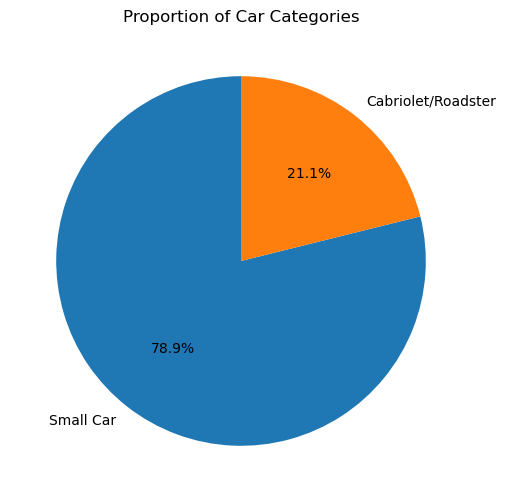

In [8]:

#Understand the proportion of cars by category (Small Car vs. Cabriolet/Roadster) to identify which category dominates the market.

#A simple pie chart for clear representation.

import matplotlib.pyplot as plt

# Prepare data
category_counts = car_golf_cleaned['category'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=category_counts.index)
plt.title("Proportion of Car Categories")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()


In [ ]:
#The pie chart highlights that Small Cars dominate the listings, making up approximately 79% of the total dataset, while Cabriolet/Roadster accounts for about 21%. This distribution suggests that the market is heavily skewed toward Small Cars, reflecting their broader appeal and affordability

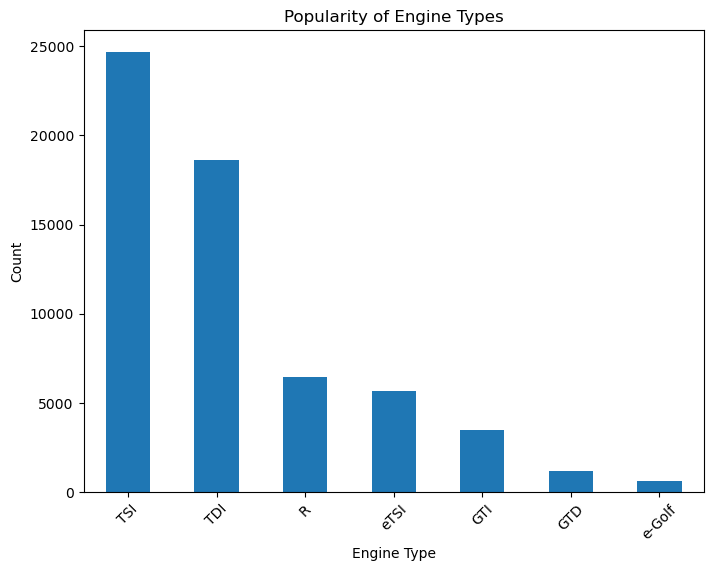

In [9]:

#Identify which engine types (e.g., TDI, TSI) are most prevalent in the dataset to guide future offerings.

#A bar chart for comparison.

# Prepare data
engine_counts = car_golf_cleaned['engine_type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
engine_counts.plot(kind='bar')
plt.title("Popularity of Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#The chart highlights the dominance of TSI and TDI engine types, with TSI leading by a significant margin. This suggests that customers heavily prefer these fuel-efficient and versatile engine types, making them a key focus for marketing and inventory management. 

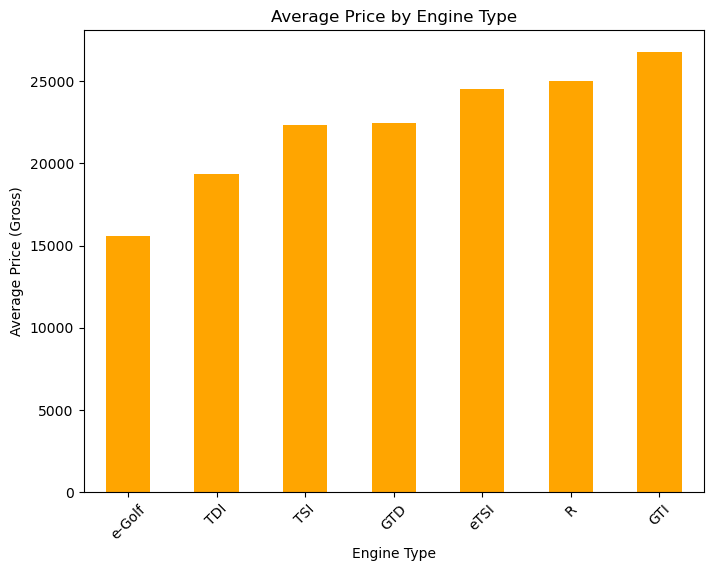

In [12]:
#1. Pricing Trend Across Engine Types

# Average price by engine type
avg_price_by_engine = car_golf_cleaned.groupby('engine_type')['price_gross'].mean().sort_values()

# Plot
plt.figure(figsize=(8, 6))
avg_price_by_engine.plot(kind='bar', color='orange')
plt.title("Average Price by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Price (Gross)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#The chart shows that GTI and R engine types command the highest average prices, indicating their appeal to customers seeking high-performance vehicles. On the other hand, e-Golf has the lowest average price, likely reflecting its niche as an affordable electric option. These insights can guide inventory focus and promotional efforts for premium or budget-conscious customers.


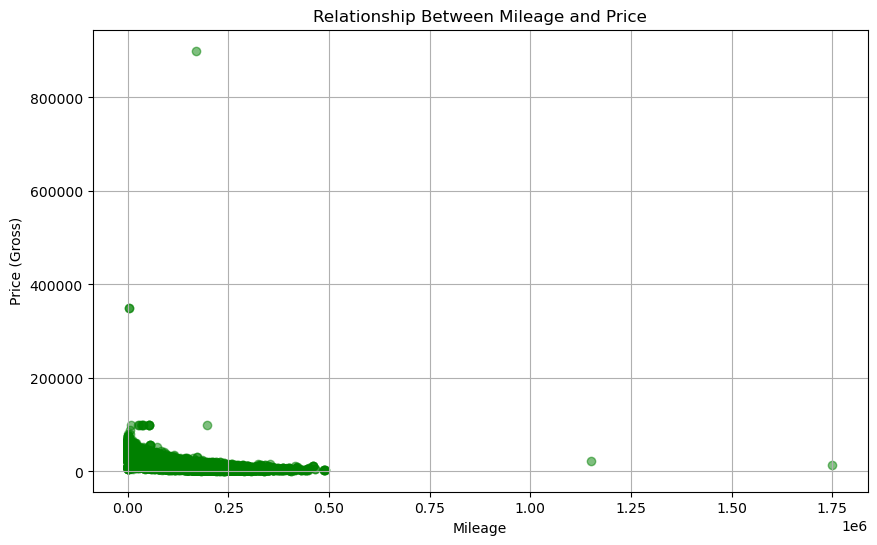

In [13]:
#2. Relationship Between Mileage and Pricing

# Scatter plot of mileage vs. price
plt.figure(figsize=(10, 6))
plt.scatter(car_golf_cleaned['mileage'], car_golf_cleaned['price_gross'], alpha=0.5, color='green')
plt.title("Relationship Between Mileage and Price")
plt.xlabel("Mileage")
plt.ylabel("Price (Gross)")
plt.grid(True)
plt.show()


In [ ]:
#The scatter plot shows a clear negative correlation between mileage and price, as vehicles with higher mileage tend to have significantly lower prices. However, there are notable outliers, including cars with low mileage but unusually high prices.

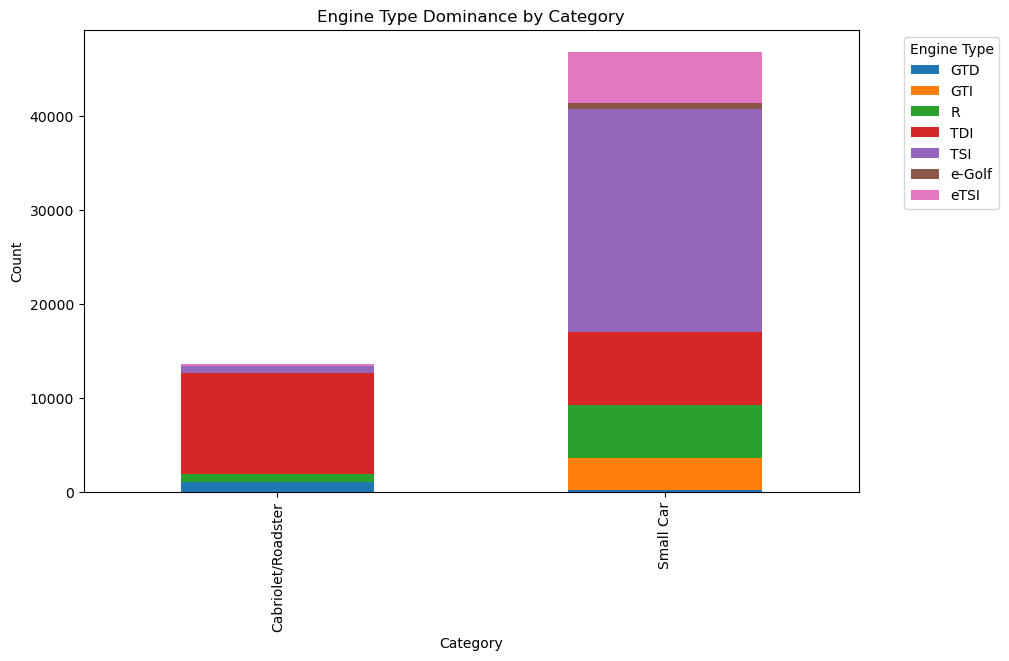

In [14]:
#Dominance of Engine Types by Category

# Count of engine types by category
engine_by_category = car_golf_cleaned.groupby(['category', 'engine_type']).size().unstack()

# Plot
engine_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Engine Type Dominance by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
#The Small Car category has a wide variety of engine types, with TSI and TDI being the most dominant. On the other hand, Cabriolet/Roadster also shows a preference for TDI and TSI, but in lower numbers. Interestingly, hybrid engines like eTSI and electric options like e-Golf have minimal representation across both categories, suggesting a market opportunity for promoting eco-friendly vehicles in these segments.


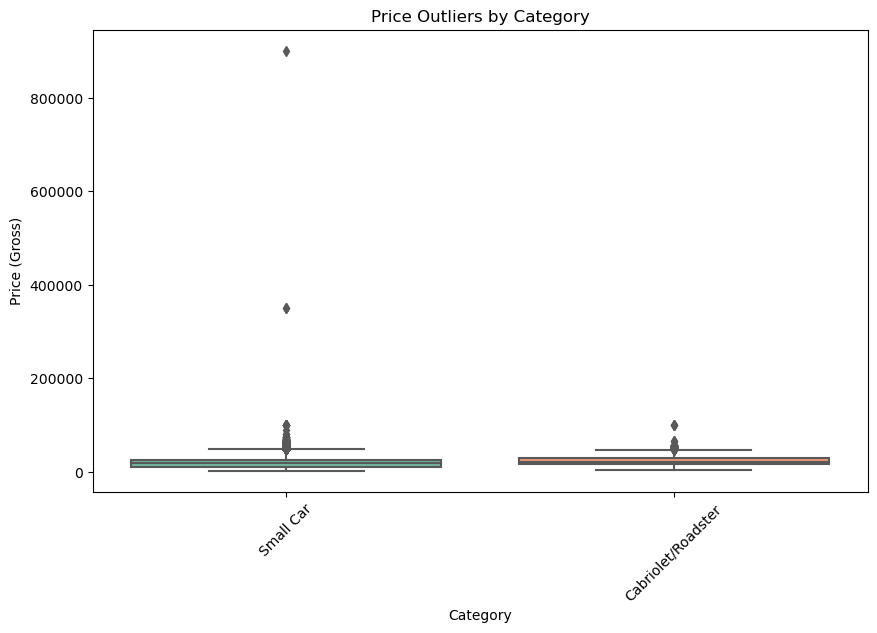

In [15]:
#Identifying Pricing Outliers by Category

import seaborn as sns

# Boxplot for price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price_gross', data=car_golf_cleaned, palette="Set2")
plt.title("Price Outliers by Category")
plt.xlabel("Category")
plt.ylabel("Price (Gross)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#The boxplot reveals that Small Cars have significant price outliers, with a few cars priced exceptionally high compared to the rest. These outliers could represent rare models or mispriced listings. Meanwhile, Cabriolet/Roadster has fewer outliers but exhibits a tighter price range, indicating more consistent pricing.